<a href="https://colab.research.google.com/github/sboonpan/Project_SET50_DMLP/blob/main/Project_SET50_ADVANCE_DMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [528]:
!pip install talib-binary
!pip install yfinance

In [529]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import talib as ta
import warnings

import random
import seaborn as sns
import matplotlib as mpl
sns.set_style('whitegrid')


warnings.simplefilter("ignore")
%matplotlib inline

# Data Preparation

## Raw Data

https://marketdata.set.or.th/mkt/sectorquotation.do?language=th&country=TH&market=SET&sector=SET50

In [530]:
symbollist = pd.read_html('https://marketdata.set.or.th/mkt/sectorquotation.do?language=th&country=TH&market=SET&sector=SET50')[2]
symbollist.iloc[:,0]

0     ADVANC
1        AOT
2        AWC
3      BANPU
4        BBL
5       BDMS
6        BEM
7      BGRIM
8         BH
9        BTS
10       CBG
11      COM7
12     CPALL
13       CPF
14       CPN
15       CRC
16      DTAC
17        EA
18      EGCO
19    GLOBAL
20      GPSC
21      GULF
22     HMPRO
23    INTUCH
24      IRPC
25       IVL
26     KBANK
27       KCE
28       KTB
29       KTC
30        LH
31      MINT
32       MTC
33        OR
34       OSP
35       PTT
36     PTTEP
37     PTTGC
38     RATCH
39     SAWAD
40       SCB
41       SCC
42      SCGP
43      STGT
44    TIDLOR
45     TISCO
46       TOP
47      TRUE
48       TTB
49        TU
Name: หลักทรัพย์, dtype: object

In [531]:
symbol = 'ADVANC.BK'
start  = '2011-01-03'
end    = '2021-12-31'

In [532]:
asset = yf.download(symbol, start, end) 
asset

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-04,85.50,87.50,85.00,86.00,50.104321,5691700
2011-01-05,86.50,87.50,86.50,87.25,50.832596,4366500
2011-01-06,87.00,87.25,86.25,87.25,50.832596,3562200
2011-01-07,86.75,86.75,85.25,86.00,50.104321,3651300
2011-01-10,85.50,85.75,84.00,84.75,49.376064,3966900
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,2762800
2021-12-27,224.00,226.00,222.00,223.00,223.000000,2884100
2021-12-28,224.00,229.00,223.00,225.00,225.000000,5460600


In [533]:
df= asset.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2682 entries, 2011-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2682 non-null   float64
 1   High       2682 non-null   float64
 2   Low        2682 non-null   float64
 3   Close      2682 non-null   float64
 4   Adj Close  2682 non-null   float64
 5   Volume     2682 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 146.7 KB


In [534]:
df.drop(columns = ['Volume'], inplace = True)
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2011-01-04,85.50,87.50,85.00,86.00,50.104321
2011-01-05,86.50,87.50,86.50,87.25,50.832596
2011-01-06,87.00,87.25,86.25,87.25,50.832596
2011-01-07,86.75,86.75,85.25,86.00,50.104321
2011-01-10,85.50,85.75,84.00,84.75,49.376064
...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000
2021-12-27,224.00,226.00,222.00,223.00,223.000000
2021-12-28,224.00,229.00,223.00,225.00,225.000000


In [535]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
dtype: int64

In [536]:
df.describe()

,Open,High,Low,Close,Adj Close
count,2682.000000,2682.000000,2682.000000,2682.000000,2682.000000
mean,191.700410,193.655295,189.739094,191.654642,153.709546
std,39.972511,40.508508,39.335602,39.911727,37.020648
min,77.500000,80.000000,77.000000,79.000000,46.026058
25%,172.000000,174.000000,171.000000,172.500000,135.673279
50%,192.000000,193.500000,190.000000,192.000000,164.723526
75%,216.750000,219.000000,214.000000,216.000000,178.271648
max,308.000000,311.000000,303.000000,310.000000,230.000000


In [537]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2682 entries, 2011-01-04 to 2021-12-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2682 non-null   float64
 1   High       2682 non-null   float64
 2   Low        2682 non-null   float64
 3   Close      2682 non-null   float64
 4   Adj Close  2682 non-null   float64
dtypes: float64(5)
memory usage: 125.7 KB


# Data Preparation

In [538]:
df

,Open,High,Low,Close,Adj Close
Date,,,,,
2011-01-04,85.50,87.50,85.00,86.00,50.104321
2011-01-05,86.50,87.50,86.50,87.25,50.832596
2011-01-06,87.00,87.25,86.25,87.25,50.832596
2011-01-07,86.75,86.75,85.25,86.00,50.104321
2011-01-10,85.50,85.75,84.00,84.75,49.376064
...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000
2021-12-27,224.00,226.00,222.00,223.00,223.000000
2021-12-28,224.00,229.00,223.00,225.00,225.000000


In [539]:
df.pct_change().dropna()

,Open,High,Low,Close,Adj Close
Date,,,,,
2011-01-05,0.011696,0.000000,0.017647,0.014535,0.014535
2011-01-06,0.005780,-0.002857,-0.002890,0.000000,0.000000
2011-01-07,-0.002874,-0.005731,-0.011594,-0.014327,-0.014327
2011-01-10,-0.014409,-0.011527,-0.014663,-0.014535,-0.014535
2011-01-11,-0.008772,-0.011662,0.000000,-0.002950,-0.002950
...,...,...,...,...,...
2021-12-24,0.032110,-0.017391,0.018349,-0.008850,-0.008850
2021-12-27,-0.004444,0.000000,0.000000,-0.004464,-0.004464
2021-12-28,0.000000,0.013274,0.004505,0.008969,0.008969


In [540]:
df.pct_change().dropna().describe()

,Open,High,Low,Close,Adj Close
count,2681.000000,2681.000000,2681.000000,2681.000000,2681.000000
mean,0.000511,0.000464,0.000485,0.000509,0.000708
std,0.016821,0.014270,0.015196,0.016808,0.016653
min,-0.107639,-0.113636,-0.194301,-0.194301,-0.194300
25%,-0.008333,-0.006116,-0.005714,-0.008230,-0.008032
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.009259,0.006623,0.008287,0.008621,0.008621
max,0.107759,0.108247,0.110132,0.108247,0.108248


In [541]:
df.resample(rule = 'A').mean()

,Open,High,Low,Close,Adj Close
Date,,,,,
2011-12-31,107.864754,109.065574,106.744877,108.015369,66.348801
2012-12-31,187.230612,189.467347,185.261224,187.348980,121.933703
2013-12-31,246.606122,250.161224,242.928571,246.369388,168.032466
2014-12-31,223.036735,225.504082,220.679592,223.206122,160.064119
2015-12-31,232.684426,234.745902,230.211066,232.256148,175.476837
2016-12-31,160.793033,162.524590,159.053279,160.620902,129.007739
2017-12-31,178.623967,179.973140,177.497934,178.725207,151.750820
2018-12-31,194.412245,195.987755,192.820408,194.397959,171.270504
2019-12-31,204.209016,206.016393,202.122951,204.190574,187.255906


In [542]:
df.pct_change().resample(rule = 'A').mean()

,Open,High,Low,Close,Adj Close
Date,,,,,
2011-12-31,0.002233,0.002102,0.002172,0.002178,0.002502
2012-12-31,0.001831,0.001807,0.001758,0.001782,0.001993
2013-12-31,0.000075,-0.000024,0.000009,0.000069,0.000244
2014-12-31,0.000979,0.000961,0.001018,0.001069,0.001291
2015-12-31,-0.001796,-0.001861,-0.001825,-0.001838,-0.001628
2016-12-31,-0.000008,-0.000049,0.000041,0.000058,0.000327
2017-12-31,0.001108,0.001103,0.001089,0.001137,0.001316
2018-12-31,-0.000372,-0.000360,-0.000388,-0.000345,-0.000197
2019-12-31,0.001080,0.000980,0.001005,0.000958,0.001104


In [543]:
df.pct_change().resample(rule = 'A').std()

,Open,High,Low,Close,Adj Close
Date,,,,,
2011-12-31,0.016963,0.014741,0.016181,0.017694,0.017276
2012-12-31,0.017706,0.015057,0.014612,0.017961,0.017897
2013-12-31,0.024217,0.019613,0.021038,0.022829,0.022693
2014-12-31,0.017067,0.014015,0.015763,0.016255,0.016244
2015-12-31,0.017642,0.016014,0.017373,0.020309,0.020135
2016-12-31,0.019798,0.016882,0.018900,0.019833,0.019595
2017-12-31,0.010814,0.009857,0.010050,0.010476,0.010258
2018-12-31,0.012870,0.010587,0.010634,0.011934,0.011690
2019-12-31,0.014501,0.010811,0.011733,0.013671,0.013631


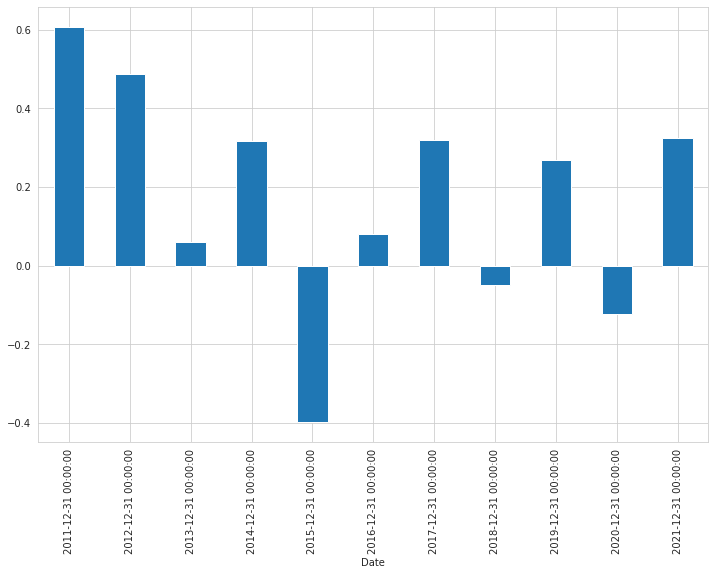

In [544]:
#import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

df_yearly = df.pct_change()['Adj Close'].resample(rule='A').sum()
df_yearly.plot(kind='bar')

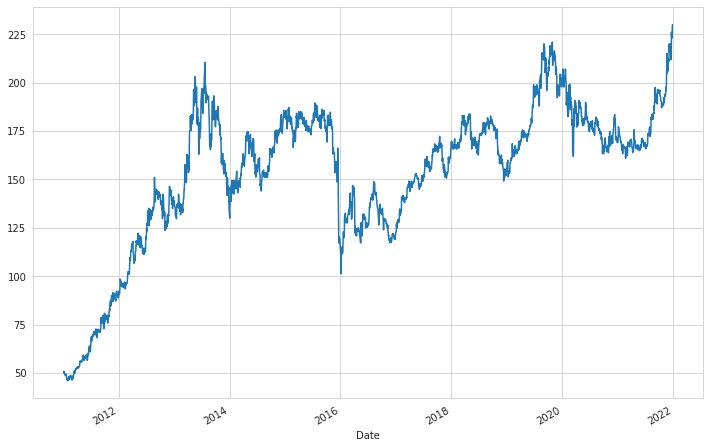

In [545]:
#import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 8.0)
df['Adj Close'].plot()

In [546]:
df['Returns'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Returns
Date,,,,,,
2011-01-05,86.50,87.50,86.50,87.25,50.832596,0.014431
2011-01-06,87.00,87.25,86.25,87.25,50.832596,0.000000
2011-01-07,86.75,86.75,85.25,86.00,50.104321,-0.014431
2011-01-10,85.50,85.75,84.00,84.75,49.376064,-0.014641
2011-01-11,84.75,84.75,84.00,84.50,49.230415,-0.002954
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929


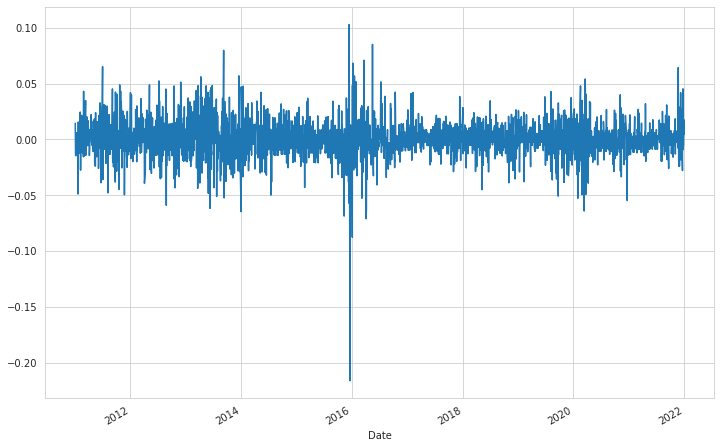

In [547]:
df['Returns'].plot()

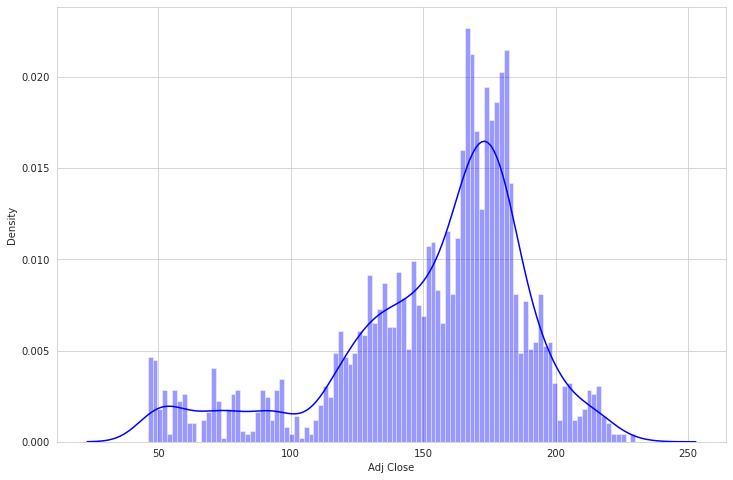

In [548]:
sns.distplot(df['Adj Close'], color = 'blue', bins = 100)

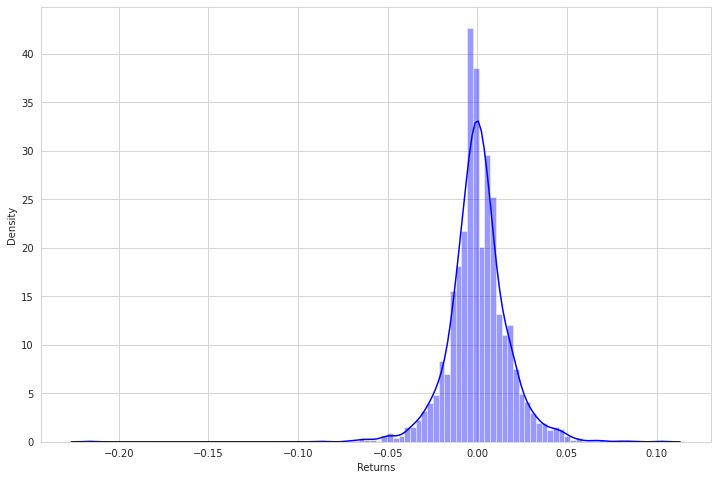

In [549]:
sns.distplot(df['Returns'], color = 'blue', bins = 100)

Text(0.6, 0.8, 'Q3: 0.0086%')

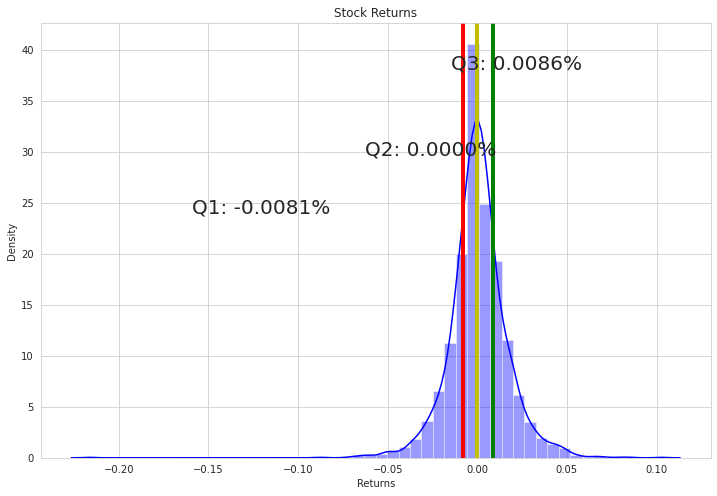

In [550]:
sns.distplot(df['Returns'], color='blue')

q1 = df['Returns'].quantile(0.25)
q2 = df['Returns'].quantile(0.5)
q3 = df['Returns'].quantile(0.75)

plt.title("Stock Returns")

plt.axvline(x=q1, linewidth=4, color='r')
plt.figtext(0.3, 0.55, "Q1: %.4f" % q1 + "%",fontsize=20)

plt.axvline(x=q2, linewidth=4, color='y')
plt.figtext(0.5, 0.65, "Q2: %.4f" % q2 + "%",fontsize=20)

plt.axvline(x=q3, linewidth=4, color='g')
plt.figtext(0.6, 0.8, "Q3: %.4f" % q3 + "%",fontsize=20)

Text(0.6, 0.8, 'P99: 0.0461%')

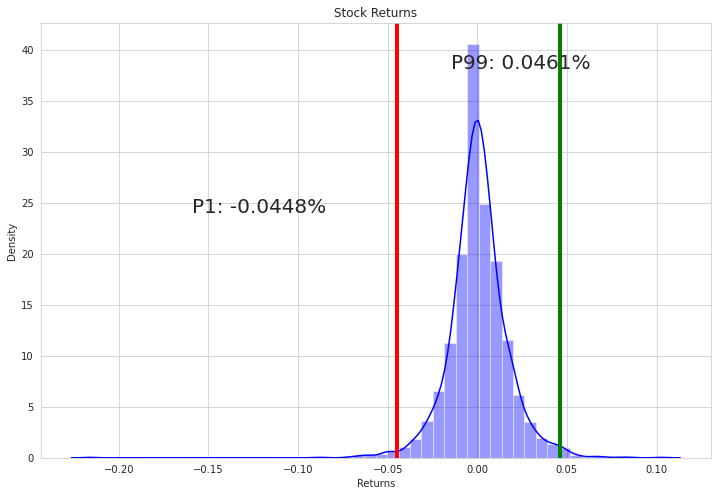

In [551]:
sns.distplot(df['Returns'], color='blue')

q1 = df['Returns'].quantile(0.01)
#q2 = df['Returns'].quantile(0.5)
q3 = df['Returns'].quantile(0.99)

plt.title("Stock Returns")

plt.axvline(x=q1, linewidth=4, color='r')
plt.figtext(0.3, 0.55, "P1: %.4f" % q1 + "%",fontsize=20)

#plt.axvline(x=q2, linewidth=4, color='y')
#plt.figtext(0.5, 0.65, "Q2: %.4f" % q2 + "%",fontsize=20)

plt.axvline(x=q3, linewidth=4, color='g')
plt.figtext(0.6, 0.8, "P99: %.4f" % q3 + "%",fontsize=20)

### Detecting Outliers

In [552]:
df_outliers = df['Returns'].rolling(60).agg(["mean", "std"])
df_outliers = df.join(df_outliers)
df_outliers

,Open,High,Low,Close,Adj Close,Returns,mean,std
Date,,,,,,,,
2011-01-05,86.50,87.50,86.50,87.25,50.832596,0.014431,NaN,NaN
2011-01-06,87.00,87.25,86.25,87.25,50.832596,0.000000,NaN,NaN
2011-01-07,86.75,86.75,85.25,86.00,50.104321,-0.014431,NaN,NaN
2011-01-10,85.50,85.75,84.00,84.75,49.376064,-0.014641,NaN,NaN
2011-01-11,84.75,84.75,84.00,84.50,49.230415,-0.002954,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.002268,0.016198
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.002194,0.016219
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.002428,0.016213


In [553]:
def outlier_detection(df, n_sigmas = 3):
    
    x = df["Returns"]
    mu = df["mean"]
    sigma = df["std"]
    
    if (x > mu + sigma*n_sigmas) | (x < mu - n_sigmas * sigma):
        return 1
    else:
        return 0

In [554]:
df_outliers.apply(outlier_detection, axis=1)

Date
2011-01-05    0
2011-01-06    0
2011-01-07    0
2011-01-10    0
2011-01-11    0
             ..
2021-12-24    0
2021-12-27    0
2021-12-28    0
2021-12-29    0
2021-12-30    0
Length: 2681, dtype: int64

In [555]:
df_outliers['outlier'] = df_outliers.apply(outlier_detection, axis=1)

In [556]:
con = df_outliers['outlier'] == 1
df_outliers[con]

,Open,High,Low,Close,Adj Close,Returns,mean,std,outlier
Date,,,,,,,,,
2011-06-23,104.5,104.5,100.5,101.0,61.499969,-0.038840,3.174981e-03,0.013874,1
2011-07-04,110.0,112.0,108.0,111.0,67.589066,0.065139,4.417495e-03,0.016584,1
2012-04-05,181.5,182.0,174.0,174.5,112.793320,-0.039331,2.258220e-03,0.012942,1
2012-08-27,225.0,225.0,214.0,214.0,142.323929,-0.058974,3.220293e-03,0.020234,1
2013-09-09,260.0,274.0,258.0,274.0,190.395691,0.079739,2.588040e-03,0.024183,1
2013-12-18,207.0,221.0,206.0,217.0,150.787796,0.056887,-4.128733e-03,0.019038,1
2015-02-25,233.0,233.0,226.0,227.0,166.559006,-0.043110,-8.585593e-04,0.012988,1
2015-08-24,231.0,235.0,228.0,229.0,177.005539,-0.034338,9.379602e-05,0.010483,1
2015-11-12,215.0,219.0,210.0,211.0,163.092453,-0.068677,-1.437018e-03,0.016405,1


In [557]:
df_outliers[con].shape

(27, 9)

In [558]:
outliers = df_outliers.loc[df_outliers['outlier'] == 1,  ['Returns']]
outliers

,Returns
Date,
2011-06-23,-0.038840
2011-07-04,0.065139
2012-04-05,-0.039331
2012-08-27,-0.058974
2013-09-09,0.079739
2013-12-18,0.056887
2015-02-25,-0.043110
2015-08-24,-0.034338
2015-11-12,-0.068677


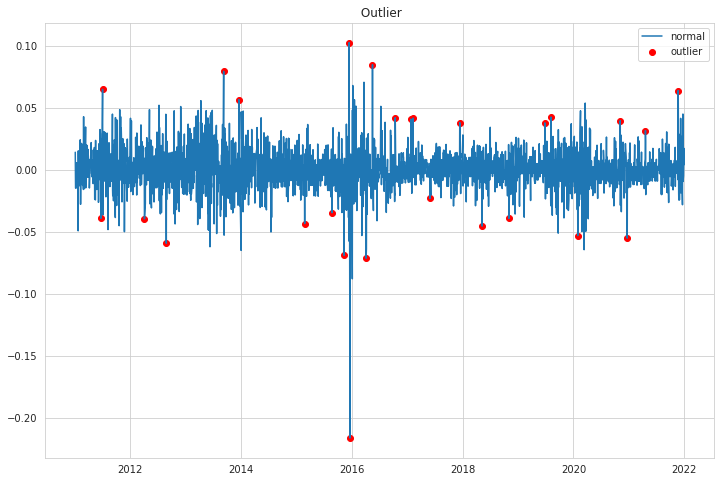

In [559]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 8.0)

fig, ax = plt.subplots()

ax.plot(df_outliers.index, df_outliers["Returns"], label='normal')
ax.scatter(outliers.index, outliers["Returns"], color="red", label="outlier")
ax.set_title(f" Outlier")
ax.legend()
plt.show()

In [560]:
condition_2 = df_outliers['outlier'] != 1
df = df_outliers[condition_2]
df

,Open,High,Low,Close,Adj Close,Returns,mean,std,outlier
Date,,,,,,,,,
2011-01-05,86.50,87.50,86.50,87.25,50.832596,0.014431,NaN,NaN,0
2011-01-06,87.00,87.25,86.25,87.25,50.832596,0.000000,NaN,NaN,0
2011-01-07,86.75,86.75,85.25,86.00,50.104321,-0.014431,NaN,NaN,0
2011-01-10,85.50,85.75,84.00,84.75,49.376064,-0.014641,NaN,NaN,0
2011-01-11,84.75,84.75,84.00,84.50,49.230415,-0.002954,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.002268,0.016198,0
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.002194,0.016219,0
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.002428,0.016213,0


In [561]:
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Returns,mean,std,outlier
Date,,,,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713,0.000850,0.014719,0
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540,0.000517,0.014633,0
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299,0.000656,0.014667,0
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956,0.000929,0.014533,0
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878,0.001125,0.014398,0
...,...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.002268,0.016198,0
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.002194,0.016219,0
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.002428,0.016213,0


In [562]:
df.drop(columns = 'outlier', inplace = True)
df

,Open,High,Low,Close,Adj Close,Returns,mean,std
Date,,,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713,0.000850,0.014719
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540,0.000517,0.014633
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299,0.000656,0.014667
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956,0.000929,0.014533
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878,0.001125,0.014398
...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.002268,0.016198
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.002194,0.016219
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.002428,0.016213


In [563]:
df.drop(columns = ['mean',	'std'], inplace = True)
df

,Open,High,Low,Close,Adj Close,Returns
Date,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929


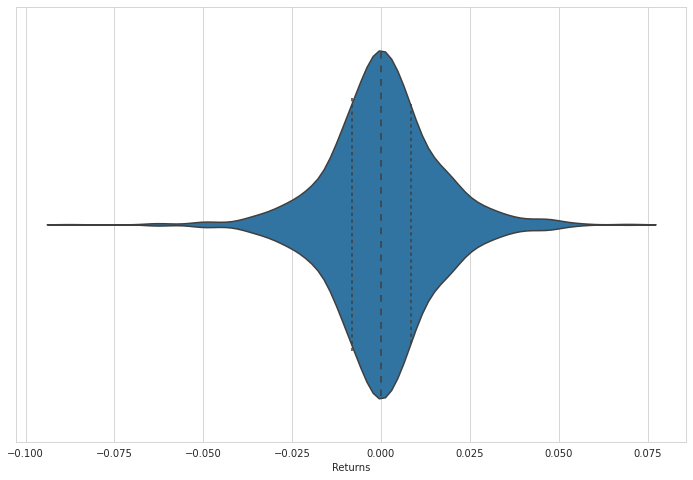

In [564]:
from scipy import stats
sns.violinplot(df['Returns'],inner="quartile")

((array([-3.46302128, -3.21674405, -3.08041167, ...,  3.08041167,
          3.21674405,  3.46302128]),
  array([-0.0876473 , -0.0647057 , -0.06417832, ...,  0.05677653,
          0.06824904,  0.07087449])),
 (0.015170052986482597, 0.0005797264380924479, 0.9863366982204148))

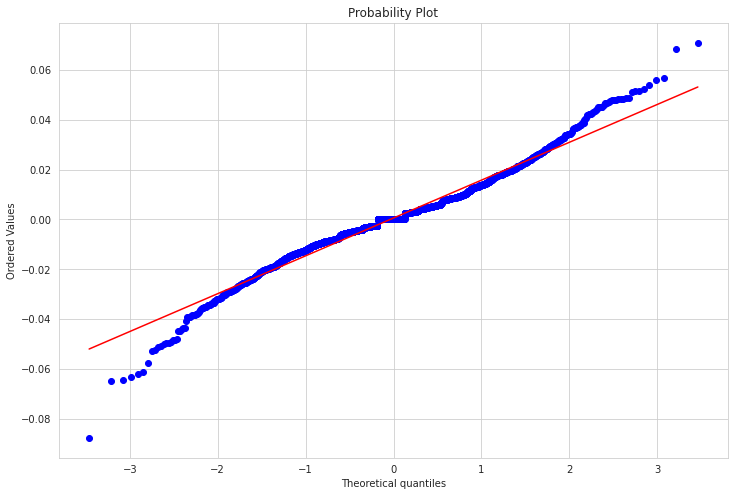

In [565]:
stats.probplot(df['Returns'], dist="norm", plot=plt)

In [566]:
df

,Open,High,Low,Close,Adj Close,Returns
Date,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878
...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929


# Feature Preparation  

In [567]:
df['Mean'] = df['Returns'].rolling(14).mean()

In [568]:
df['STD'] = df['Returns'].rolling(14).std()

In [569]:
df.head(20)

,Open,High,Low,Close,Adj Close,Returns,Mean,STD
Date,,,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713,NaN,NaN
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540,NaN,NaN
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299,NaN,NaN
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956,NaN,NaN
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878,NaN,NaN
2011-04-07,87.75,88.00,87.25,87.50,53.279694,0.008609,NaN,NaN
2011-04-08,88.00,88.25,86.25,86.25,52.518551,-0.014389,NaN,NaN
2011-04-11,87.50,87.75,86.00,86.25,52.518551,0.000000,NaN,NaN
2011-04-12,86.50,86.50,86.00,86.50,52.670776,0.002894,NaN,NaN


In [570]:
Momentum = ta.MOM(df['Adj Close'], 14)
df['Mom'] = Momentum
df.head(20)

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom
Date,,,,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713,NaN,NaN,NaN
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540,NaN,NaN,NaN
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299,NaN,NaN,NaN
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956,NaN,NaN,NaN
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878,NaN,NaN,NaN
2011-04-07,87.75,88.00,87.25,87.50,53.279694,0.008609,NaN,NaN,NaN
2011-04-08,88.00,88.25,86.25,86.25,52.518551,-0.014389,NaN,NaN,NaN
2011-04-11,87.50,87.75,86.00,86.25,52.518551,0.000000,NaN,NaN,NaN
2011-04-12,86.50,86.50,86.00,86.50,52.670776,0.002894,NaN,NaN,NaN


In [571]:
RSI = ta.RSI(df['Adj Close'], 14)
df['RSI'] = RSI
df.head(20)

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom,RSI
Date,,,,,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713,NaN,NaN,NaN,NaN
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540,NaN,NaN,NaN,NaN
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299,NaN,NaN,NaN,NaN
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956,NaN,NaN,NaN,NaN
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878,NaN,NaN,NaN,NaN
2011-04-07,87.75,88.00,87.25,87.50,53.279694,0.008609,NaN,NaN,NaN,NaN
2011-04-08,88.00,88.25,86.25,86.25,52.518551,-0.014389,NaN,NaN,NaN,NaN
2011-04-11,87.50,87.75,86.00,86.25,52.518551,0.000000,NaN,NaN,NaN,NaN
2011-04-12,86.50,86.50,86.00,86.50,52.670776,0.002894,NaN,NaN,NaN,NaN


In [572]:
df['EMA'] = ta.EMA(df['Adj Close'],14)
df.head(20)

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom,RSI,EMA
Date,,,,,,,,,,,
2011-03-30,89.50,90.50,89.50,90.50,52.726063,0.016713,NaN,NaN,NaN,NaN,NaN
2011-03-31,90.75,90.75,89.50,90.00,52.434761,-0.005540,NaN,NaN,NaN,NaN,NaN
2011-04-01,90.25,91.00,90.25,90.75,52.871708,0.008299,NaN,NaN,NaN,NaN,NaN
2011-04-04,87.50,88.00,86.75,87.00,52.975235,0.001956,NaN,NaN,NaN,NaN,NaN
2011-04-05,87.00,87.00,86.50,86.75,52.823002,-0.002878,NaN,NaN,NaN,NaN,NaN
2011-04-07,87.75,88.00,87.25,87.50,53.279694,0.008609,NaN,NaN,NaN,NaN,NaN
2011-04-08,88.00,88.25,86.25,86.25,52.518551,-0.014389,NaN,NaN,NaN,NaN,NaN
2011-04-11,87.50,87.75,86.00,86.25,52.518551,0.000000,NaN,NaN,NaN,NaN,NaN
2011-04-12,86.50,86.50,86.00,86.50,52.670776,0.002894,NaN,NaN,NaN,NaN,NaN


In [574]:
df['Mean'] = df['Mean'].astype('float')
df['STD'] = df['STD'].astype('float')
df['Mom'] = df['Mom'].astype('float')
df['RSI'] = df['RSI'].astype('float')
df['EMA'] = df['EMA'].astype('float')
df = df.dropna()
df

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom,RSI,EMA
Date,,,,,,,,,,,
2011-04-25,91.25,91.75,91.00,91.75,55.867554,-0.002721,0.004134,0.009855,3.141491,75.500126,53.880424
2011-04-26,92.00,92.00,90.75,91.25,55.563114,-0.005464,0.004139,0.009850,3.128353,71.684653,54.104782
2011-04-27,91.50,92.25,91.50,91.50,55.715336,0.002736,0.003742,0.009781,2.843628,72.434759,54.319523
2011-04-28,91.50,92.75,91.50,91.75,55.867554,0.002728,0.003797,0.009772,2.892319,73.199334,54.525927
2011-04-29,92.25,92.75,91.75,92.50,56.324234,0.008141,0.004584,0.009636,3.501232,75.403587,54.765701
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.003933,0.021394,12.000000,63.252225,217.151389
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.003613,0.021491,11.000000,61.873966,217.931204
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.004589,0.021393,14.000000,63.583087,218.873710


In [575]:
Stock = df.copy()
Stock 

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom,RSI,EMA
Date,,,,,,,,,,,
2011-04-25,91.25,91.75,91.00,91.75,55.867554,-0.002721,0.004134,0.009855,3.141491,75.500126,53.880424
2011-04-26,92.00,92.00,90.75,91.25,55.563114,-0.005464,0.004139,0.009850,3.128353,71.684653,54.104782
2011-04-27,91.50,92.25,91.50,91.50,55.715336,0.002736,0.003742,0.009781,2.843628,72.434759,54.319523
2011-04-28,91.50,92.75,91.50,91.75,55.867554,0.002728,0.003797,0.009772,2.892319,73.199334,54.525927
2011-04-29,92.25,92.75,91.75,92.50,56.324234,0.008141,0.004584,0.009636,3.501232,75.403587,54.765701
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.003933,0.021394,12.000000,63.252225,217.151389
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.003613,0.021491,11.000000,61.873966,217.931204
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.004589,0.021393,14.000000,63.583087,218.873710


In [576]:
Stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2581 entries, 2011-04-25 to 2021-12-30
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2581 non-null   float64
 1   High       2581 non-null   float64
 2   Low        2581 non-null   float64
 3   Close      2581 non-null   float64
 4   Adj Close  2581 non-null   float64
 5   Returns    2581 non-null   float64
 6   Mean       2581 non-null   float64
 7   STD        2581 non-null   float64
 8   Mom        2581 non-null   float64
 9   RSI        2581 non-null   float64
 10  EMA        2581 non-null   float64
dtypes: float64(11)
memory usage: 242.0 KB


In [578]:
Stock['Target'] = Stock['Returns'].shift(-1)
Stock

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom,RSI,EMA,Target
Date,,,,,,,,,,,,
2011-04-25,91.25,91.75,91.00,91.75,55.867554,-0.002721,0.004134,0.009855,3.141491,75.500126,53.880424,-0.005464
2011-04-26,92.00,92.00,90.75,91.25,55.563114,-0.005464,0.004139,0.009850,3.128353,71.684653,54.104782,0.002736
2011-04-27,91.50,92.25,91.50,91.50,55.715336,0.002736,0.003742,0.009781,2.843628,72.434759,54.319523,0.002728
2011-04-28,91.50,92.75,91.50,91.75,55.867554,0.002728,0.003797,0.009772,2.892319,73.199334,54.525927,0.008141
2011-04-29,92.25,92.75,91.75,92.50,56.324234,0.008141,0.004584,0.009636,3.501232,75.403587,54.765701,-0.010869
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.003933,0.021394,12.000000,63.252225,217.151389,-0.004474
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.003613,0.021491,11.000000,61.873966,217.931204,0.008929
2021-12-28,224.00,229.00,223.00,225.00,225.000000,0.008929,0.004589,0.021393,14.000000,63.583087,218.873710,0.017622


In [579]:
Stock = Stock.dropna()
Stock

,Open,High,Low,Close,Adj Close,Returns,Mean,STD,Mom,RSI,EMA,Target
Date,,,,,,,,,,,,
2011-04-25,91.25,91.75,91.00,91.75,55.867554,-0.002721,0.004134,0.009855,3.141491,75.500126,53.880424,-0.005464
2011-04-26,92.00,92.00,90.75,91.25,55.563114,-0.005464,0.004139,0.009850,3.128353,71.684653,54.104782,0.002736
2011-04-27,91.50,92.25,91.50,91.50,55.715336,0.002736,0.003742,0.009781,2.843628,72.434759,54.319523,0.002728
2011-04-28,91.50,92.75,91.50,91.75,55.867554,0.002728,0.003797,0.009772,2.892319,73.199334,54.525927,0.008141
2011-04-29,92.25,92.75,91.75,92.50,56.324234,0.008141,0.004584,0.009636,3.501232,75.403587,54.765701,-0.010869
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,218.00,230.00,218.00,226.00,226.000000,0.045257,0.004905,0.021074,15.000000,65.981783,216.097757,-0.008889
2021-12-24,225.00,226.00,222.00,224.00,224.000000,-0.008889,0.003933,0.021394,12.000000,63.252225,217.151389,-0.004474
2021-12-27,224.00,226.00,222.00,223.00,223.000000,-0.004474,0.003613,0.021491,11.000000,61.873966,217.931204,0.008929


In [580]:
Stock.drop(columns = 'Close', inplace = True)
Stock

,Open,High,Low,Adj Close,Returns,Mean,STD,Mom,RSI,EMA,Target
Date,,,,,,,,,,,
2011-04-25,91.25,91.75,91.00,55.867554,-0.002721,0.004134,0.009855,3.141491,75.500126,53.880424,-0.005464
2011-04-26,92.00,92.00,90.75,55.563114,-0.005464,0.004139,0.009850,3.128353,71.684653,54.104782,0.002736
2011-04-27,91.50,92.25,91.50,55.715336,0.002736,0.003742,0.009781,2.843628,72.434759,54.319523,0.002728
2011-04-28,91.50,92.75,91.50,55.867554,0.002728,0.003797,0.009772,2.892319,73.199334,54.525927,0.008141
2011-04-29,92.25,92.75,91.75,56.324234,0.008141,0.004584,0.009636,3.501232,75.403587,54.765701,-0.010869
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,218.00,230.00,218.00,226.000000,0.045257,0.004905,0.021074,15.000000,65.981783,216.097757,-0.008889
2021-12-24,225.00,226.00,222.00,224.000000,-0.008889,0.003933,0.021394,12.000000,63.252225,217.151389,-0.004474
2021-12-27,224.00,226.00,222.00,223.000000,-0.004474,0.003613,0.021491,11.000000,61.873966,217.931204,0.008929
